In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
df_titles = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IMDB_DATASETS/data_title_basics_c.tsv", sep='\t')
df_ratings = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IMDB_DATASETS/data_ratings_c.tsv", sep='\t')
df_names_titles = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IMDB_DATASETS/data_name_titles_c.tsv", sep='\t')
df_names_professions = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IMDB_DATASETS/data_name_professions_c.tsv", sep='\t')
df_names = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/IMDB_DATASETS/data_name_basics_c.tsv", sep='\t')


# General analysis summary:
Data about the last 100 years of titles will be analysed to find information about the industry.
(Years: 1923 - 2023)
## About genre:
- [Most common genres](#scrollTo=dRO9SZrzCujW&line=1&uniqifier=1)
- [Top genres by average ratings](#scrollTo=7oYR1FPnxPh2)
  - [Top genres with the most 10 ratings](#scrollTo=Vg1yqiyfzOJH)
  - [Top genres with percentage of 10 ratings](#scrollTo=ZUDyqKjI9hEV)
- [Genre popularity evolution through the years](#scrollTo=ov4ektPqiPvm)
- [Genre popularity across title types (movies, tv series...)](#scrollTo=8dqf-QOwQAcJ)

## Movie analysis:
- Genre popularity evolution through years
- Runtime evolution through years
- Movie with highest number of people (actors/actresses and directors)
- Rating evolution through the years



## Most common genres
### Top five most common genres:
<pre>
1. short:         893,800 titles / 25.7% of total
2. drama:         552,200 titles / 15.9% of total
3. comedy:        370,300 titles / 10.6% of total
4. documentary:   366,400 titles / 10.5% of total
5. adult:         110,300 titles / 3.2%  of total
</pre>

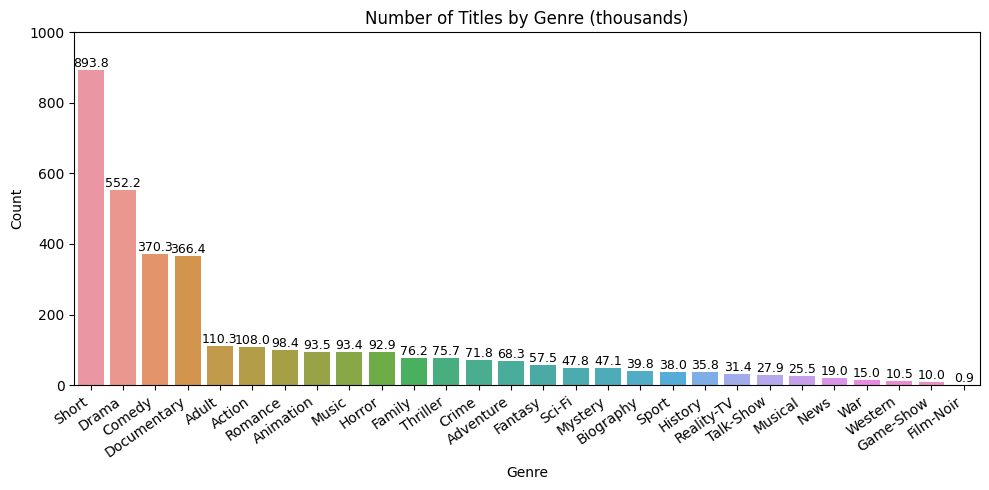

In [3]:
df_titles = df_titles.loc[df_titles['startYear']>=1923]
genre_counts = df_titles[['genres']].value_counts().reset_index()
genre_counts.columns = ['Genre','Count']
genre_counts['Count'] = (genre_counts['Count']/1000).round(1)


plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Genre', y='Count', data=genre_counts, orient='v')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Titles by Genre (thousands)')

ax.set_ylim(0, 1000)

plt.xticks(rotation=35, ha='right')
for index, row in genre_counts.iterrows():
    ax.annotate(row['Count'], (index, row['Count']), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

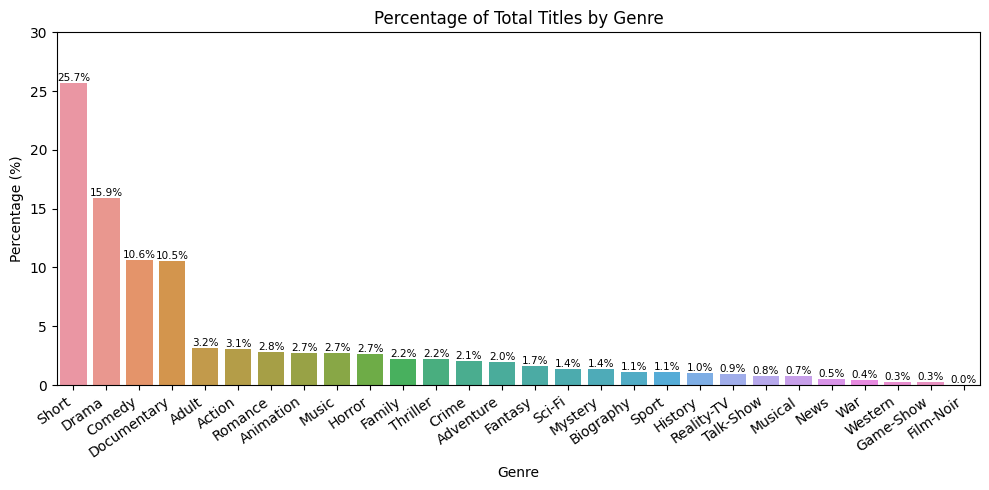

In [4]:
total_count = genre_counts['Count'].sum()

genre_counts['Percentage'] = (genre_counts['Count'] / total_count) * 100

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Genre', y='Percentage', data=genre_counts, orient='v')
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Total Titles by Genre')

ax.set_ylim(0, 30)

plt.xticks(rotation=35, ha='right')
for index, row in genre_counts.iterrows():
    ax.annotate(f'{row["Percentage"]:.1f}%', (index, row['Percentage']), ha='center', va='bottom', fontsize=7.5)

plt.tight_layout()
plt.show()

## Top genres by rating

## Top 5 genres with highest average ratings:
<pre>
- Documentary:  7.17
- History:      7.05
- Biography:    7.05
- Music:        7.02
- Short:        6.94
</pre>

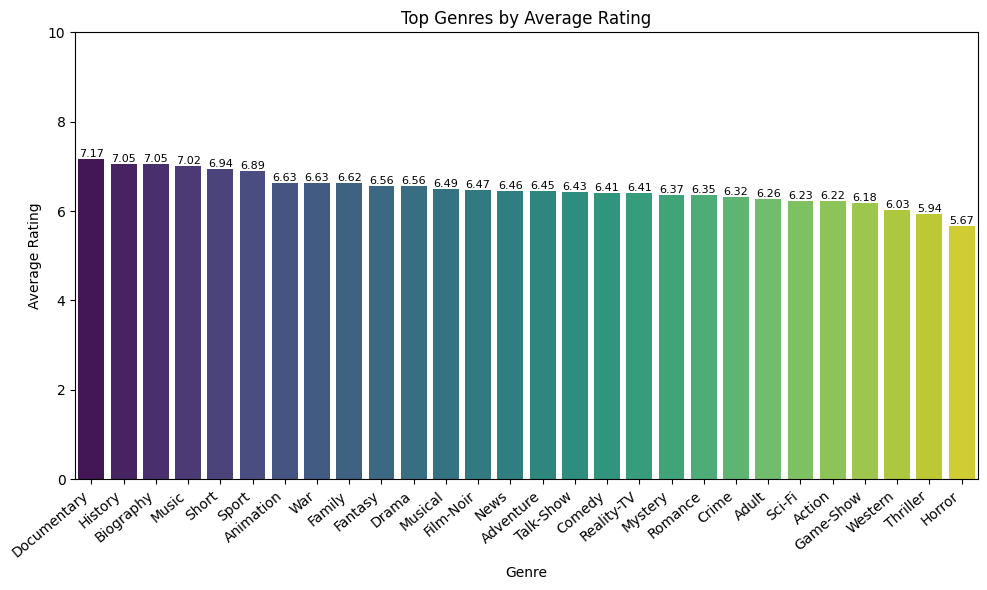

In [5]:

df_merge = pd.merge(df_titles,df_ratings,how='left',on='tconst')
genre_avg_ratings = df_merge.groupby('genres')['averageRating'].mean().reset_index().sort_values(by='averageRating',ascending=False).reset_index()
genre_avg_ratings['averageRating'] = genre_avg_ratings['averageRating'].round(2)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='genres', y='averageRating', data=genre_avg_ratings, orient='v', palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top Genres by Average Rating')

ax.set_ylim(0, 10)

plt.xticks(rotation=40, ha='right')
for index, row in genre_avg_ratings.iterrows():
    ax.annotate(row['averageRating'], (index, row['averageRating']), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### Top 5 genres by number of titles rated 10
<pre>
- Short:        819
- Drama:        351
- Comedy:       206
- Documentary:  194
- Music:         81
</pre>

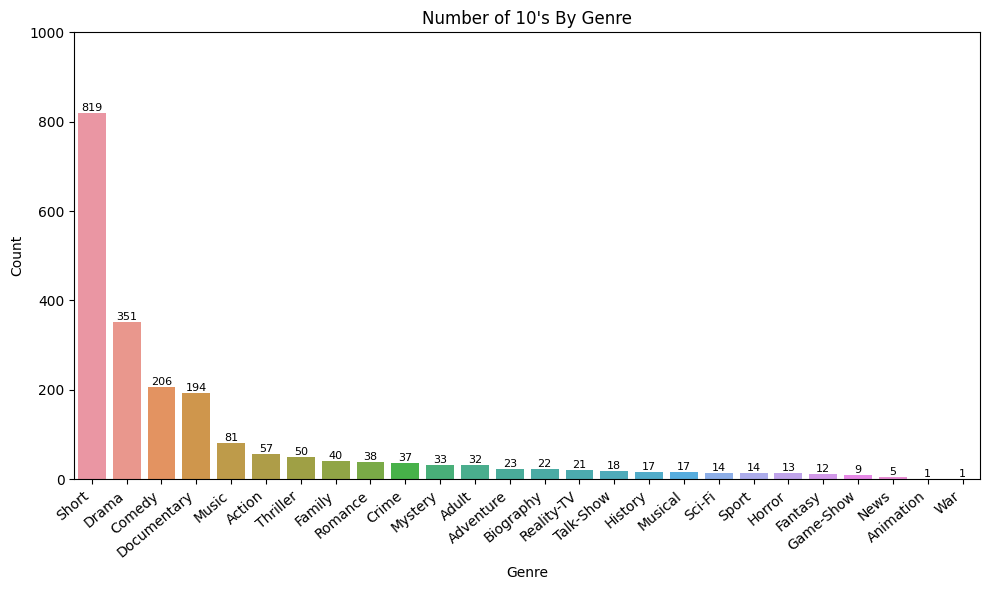

In [6]:
rated_10 = df_merge[df_merge['averageRating'] == 10]
genre_count_rated_10 = rated_10.groupby('genres')['tconst'].count().reset_index().sort_values(by='tconst',ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='genres', y='tconst', data=genre_count_rated_10, orient='v')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title("Number of 10's By Genre")

ax.set_ylim(0, 1000)

plt.xticks(rotation=40, ha='right')
for index, row in genre_count_rated_10.iterrows():
    ax.annotate(row['tconst'], (index, row['tconst']), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### Top genres by percentage of 10 ratings

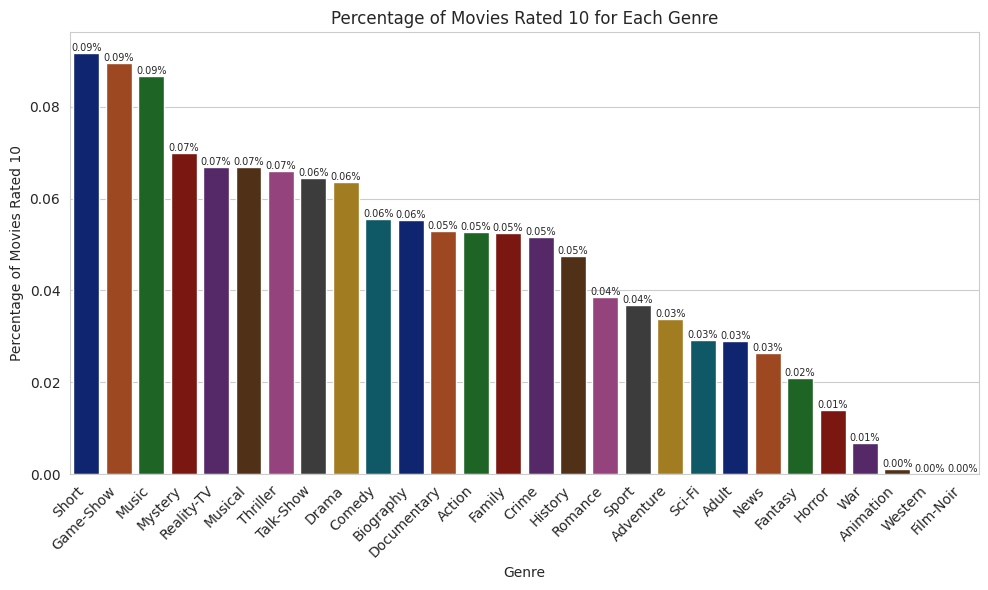

In [7]:
df_rated_10 = df_merge[df_merge['averageRating'] == 10]

# total count of movies for each genre
genre_counts_2 = df_merge['genres'].value_counts().reset_index()
genre_counts_2.columns = ['genres', 'total_count']

genre_rated_10 = df_rated_10['genres'].value_counts().reset_index()
genre_rated_10.columns = ['genres', 'rated_10_count']

genre_stats = pd.merge(genre_counts_2, genre_rated_10, on='genres', how='left')
genre_stats['percentage_rated_10'] = ((genre_stats['rated_10_count'] / genre_stats['total_count']) * 100).fillna(0)
genre_stats = genre_stats.sort_values(by='percentage_rated_10',ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))

sns.set_style("whitegrid")
sns.barplot(x="genres", y="percentage_rated_10", data=genre_stats, palette='dark')
plt.xlabel('Genre')
plt.ylabel('Percentage of Movies Rated 10')
plt.title('Percentage of Movies Rated 10 for Each Genre')

ax.set_ylim(0, 1)

for index, row in genre_stats.iterrows():
    plt.text(index, row['percentage_rated_10'], f"{row['percentage_rated_10']:.2f}%", ha='center', va='bottom', fontsize=7)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Evolution of genre popularity through the years

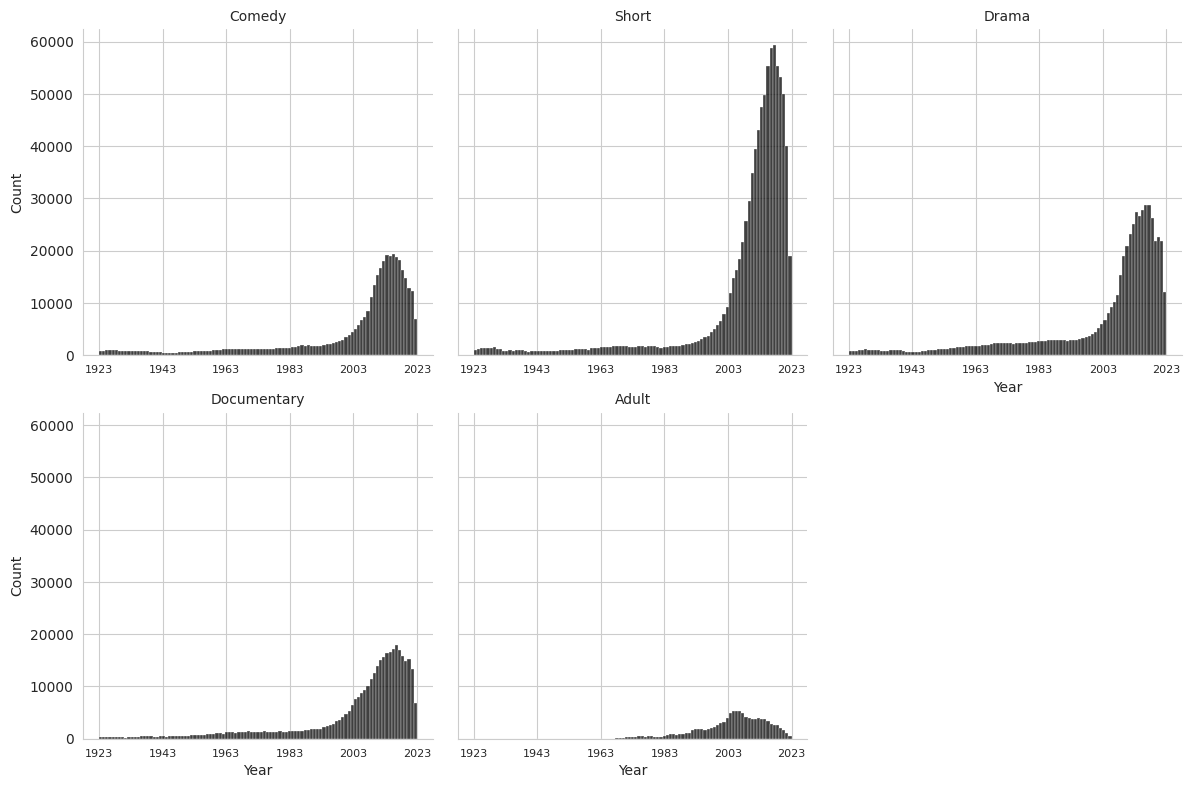

In [8]:

genres_top5 = genre_counts.head(5).copy()
df_popular_genres = df_titles[df_titles['genres'].isin(genres_top5['Genre'])].copy()
df_popular_genres = df_popular_genres.dropna(subset=['startYear'])

g = sns.FacetGrid(df_popular_genres, col='genres', col_wrap=3, height=4)
g.map_dataframe(sns.histplot, x='startYear', color='black',bins=101)
g.set_axis_labels('Year', 'Count')
g.set_titles('{col_name}')
g.tight_layout(pad=1)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True) # x-ticks labels for all facets

years = range(df_titles['startYear'].min(), df_titles['startYear'].max() + 1, 20)
g.set(xticks=years)
g.set_xticklabels(labels=years, fontsize=8)
plt.show()
sns.set_style("white")

## Genre popularity across title types (movies, tv series...)

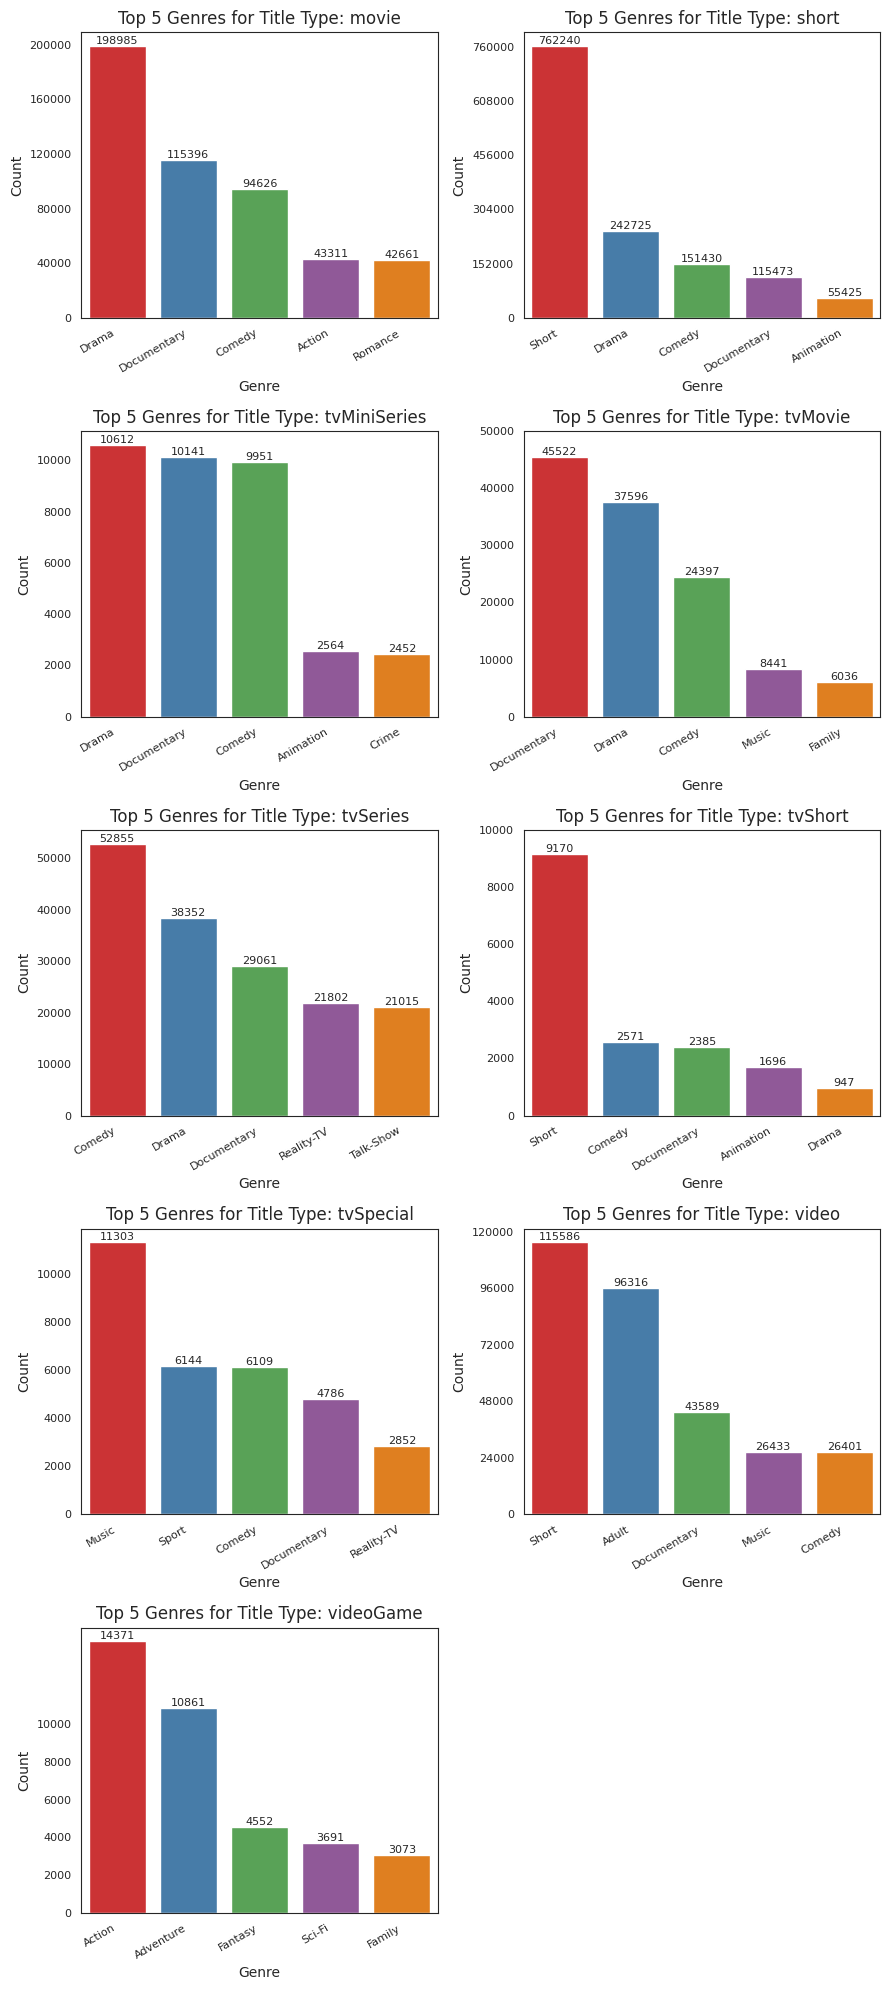

In [9]:
df_titles = df_titles.dropna(subset=['genres', 'titleType']).copy()
top_genres_by_type = df_titles.groupby('titleType')['genres'].value_counts().groupby(level=0, group_keys=False).nlargest(5).reset_index(name='Count')
unique_title_types = top_genres_by_type['titleType'].unique()
num_unique_types = len(unique_title_types)
num_rows = (num_unique_types + 1) // 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(9, 4 * num_rows))

for idx, titleType in enumerate(unique_title_types):
    subset_data = top_genres_by_type[top_genres_by_type['titleType'] == titleType]
    max_value = subset_data['Count'].max().round(-4)
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[row_idx, col_idx]

    sns.barplot(x='genres', y='Count', data=subset_data, palette='Set1', ax=ax)
    ax.set_xlabel('Genre')
    ax.set_ylabel('Count')
    ax.set_title(f'Top 5 Genres for Title Type: {titleType}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize=8)

    y_ticks = range(0, int(max_value) + 1, int(max_value / 5))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks, fontsize=8)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
if num_unique_types % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()


## Movie analysis

### Movie top 5 genre popularity evolution

In [10]:
df_movies = df_titles.loc[(df_titles['titleType']=='movie')|(df_titles['titleType']=='tvMovie')].copy()
df_movies.tail(2)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
3799895,tt9916730,movie,6 Gunn,6 Gunn,0,2017,NaN,116.0,Drama
3799896,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,NaN,49.0,Documentary


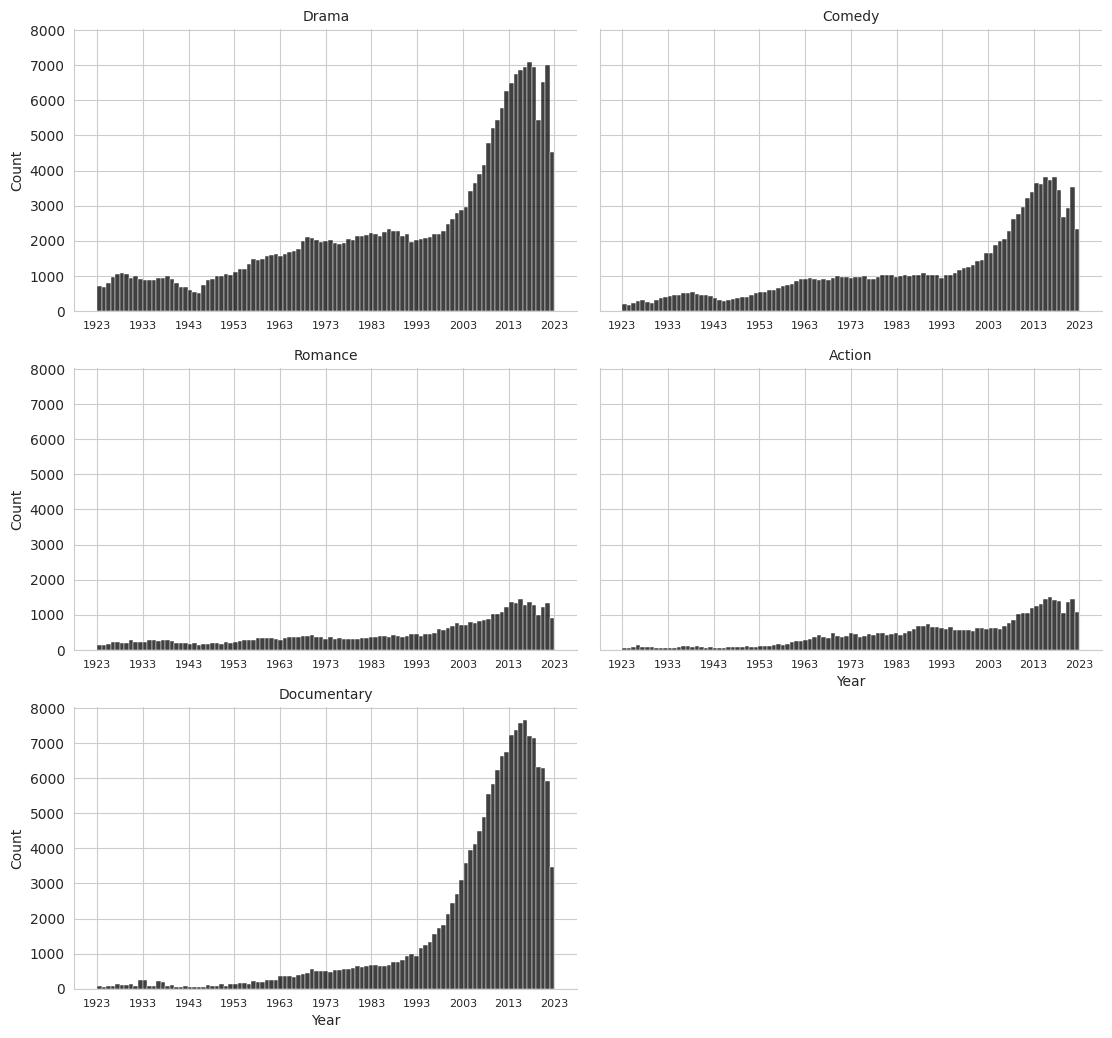

In [11]:
sns.set_style("whitegrid")

genre_counts = df_movies['genres'].value_counts().head(5).copy()
df_popular_genres = df_movies[df_movies['genres'].isin(genre_counts.index)].copy()
df_popular_genres = df_popular_genres.dropna(subset=['startYear'])

g = sns.FacetGrid(df_popular_genres, col='genres', col_wrap=2, height=3.5, aspect=1.6)
g.map_dataframe(sns.histplot, x='startYear', color='black',bins=101)
g.set_axis_labels('Year', 'Count')
g.set_titles('{col_name}')
g.tight_layout(pad=1)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

years = range(df_movies['startYear'].min(), df_movies['startYear'].max() + 1, 10)
g.set(xticks=years)
g.set_xticklabels(labels=years, fontsize=8)
plt.show()

### Runtime evolution through years